In [2]:
import cv2
print(cv2.__version__)

4.6.0


height and width : (1620, 2880)


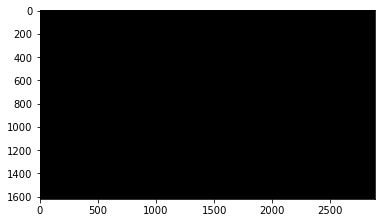

height and width : (1620, 2880)


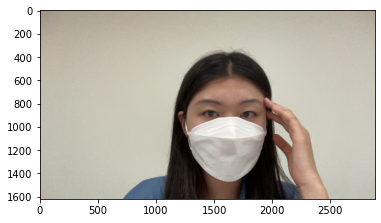

height and width : (1620, 2880)


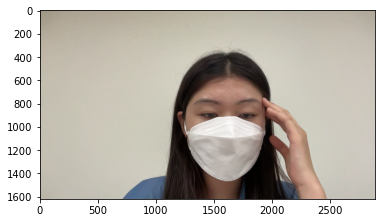

height and width : (1620, 2880)


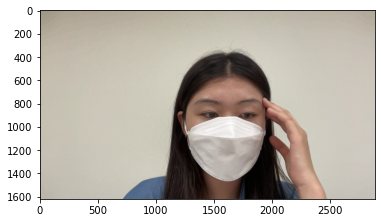

height and width : (1620, 2880)


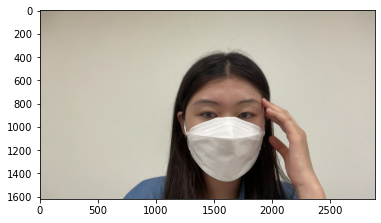

height and width : (1620, 2880)


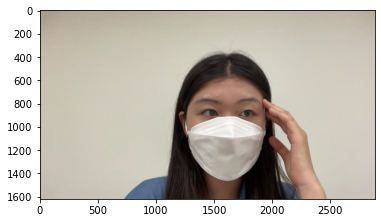

height and width : (1620, 2880)


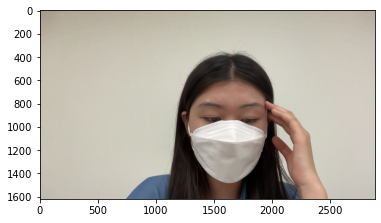

height and width : (1620, 2880)


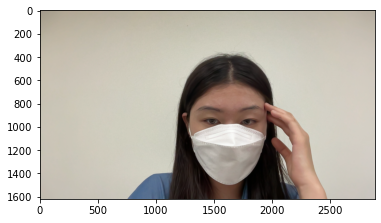

height and width : (1620, 2880)


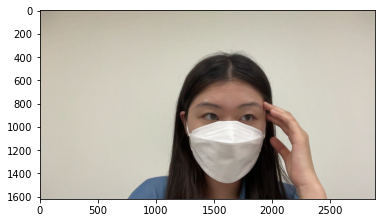

height and width : (1620, 2880)


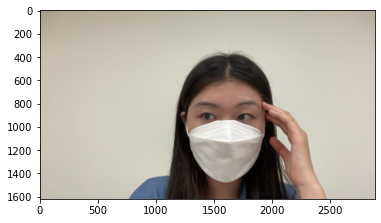

height and width : (1620, 2880)


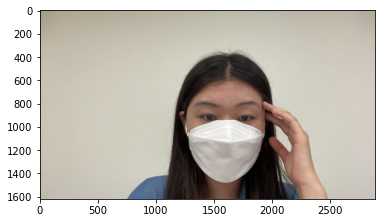

height and width : (1620, 2880)


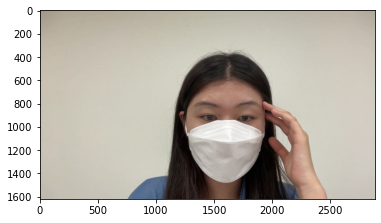

height and width : (1620, 2880)


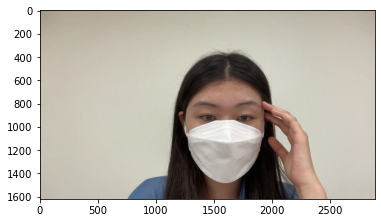

height and width : (1620, 2880)


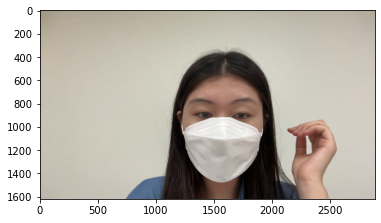

height and width : (1620, 2880)


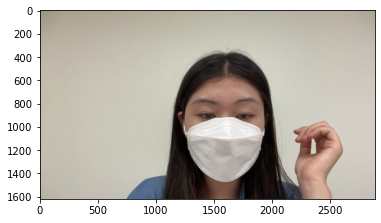

height and width : (1620, 2880)


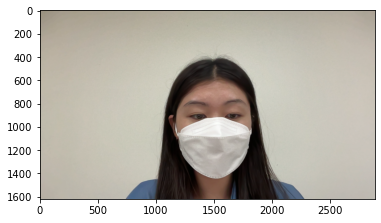

height and width : (1620, 2880)


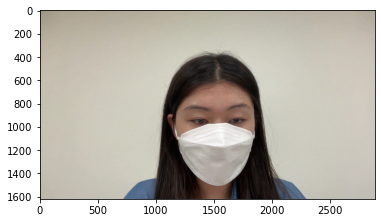

height and width : (1620, 2880)


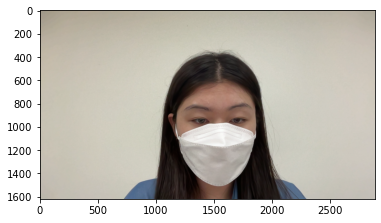

height and width : (1620, 2880)


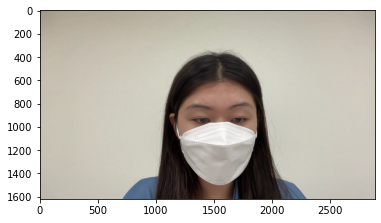

height and width : (1620, 2880)


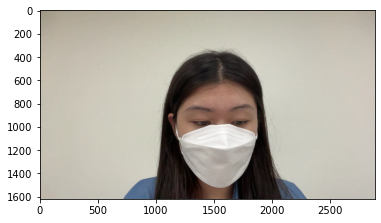

height and width : (1620, 2880)


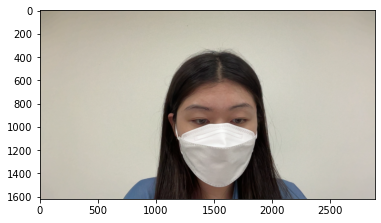

height and width : (1620, 2880)


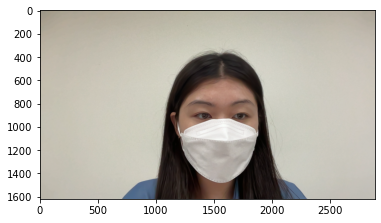

height and width : (1620, 2880)


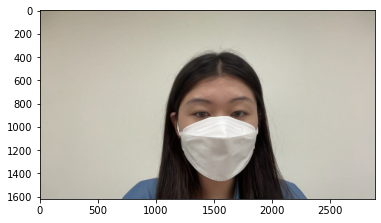

height and width : (1620, 2880)


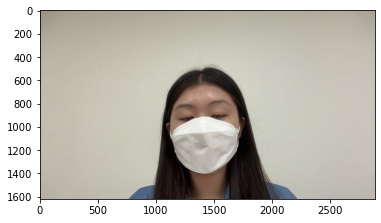

height and width : (1620, 2880)


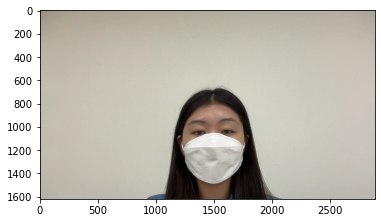

height and width : (1620, 2880)


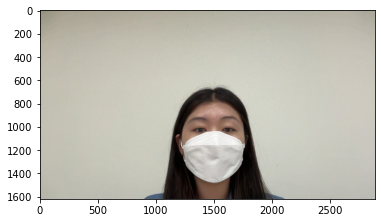

height and width : (1620, 2880)


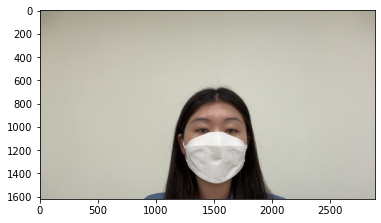

height and width : (1620, 2880)


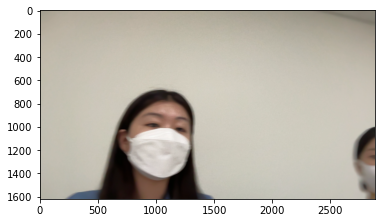

height and width : (1620, 2880)


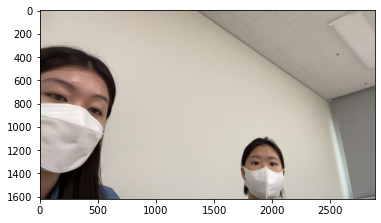

height and width : (1620, 2880)


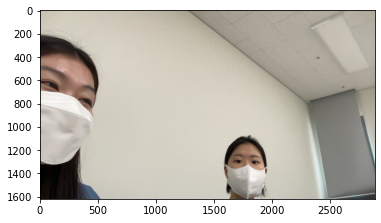

height and width : (1620, 2880)


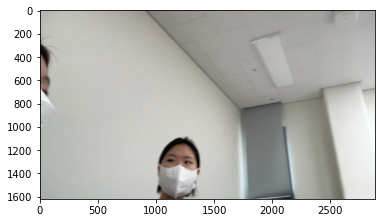

height and width : (1620, 2880)


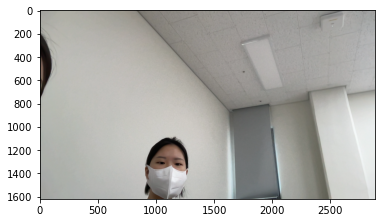

In [3]:
# 참조 코드 : https://bskyvision.com/723 
# 1초에 2번씩 이미지 캡쳐 
# 정해야하는 부분 : 이미지 크기 일단, original 은 480*640 임! 

import cv2
#matplotlib 으로 지금 캡쳐되고 있는 화면 확인해보기 
from matplotlib import pyplot as plt

# open webcam (웹캠 열기)
webcam = cv2.VideoCapture(0)

if not webcam.isOpened():
    print("Could not open webcam")
    exit()

    
img_num = 0    
# loop through frames
while webcam.isOpened():
     
    # read frame from webcam 
    status, frame = webcam.read()
    
    
    #이 코드로, frame resize 할 수 있음! 비율 1.5 배씩 늘린 것 (original: 480*640 -resized-> 720, 960)   
    frame = cv2.resize(frame ,None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)    
    #캡쳐 이미지 크기 출력해보기 
    print('height and width :' , frame.shape[:2])
    img_num = img_num + 1
    
    
    # display output
    # 읽어들인 이미지 파일을 윈도우창에 보여줍니다.
    cv2.imshow("captured frames", frame)
    
    #matplotlib 로 출력하기 , +RGB 순서 반대여서 바꿔야함 
    frame2 = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    plt.imshow(frame2)
    plt.show()
    
    
    #cv2.imwrite() 함수를 이용하여 변환된 이미지나 동영상의 특정 프레임을 저장합니다.
    cv2.imwrite('./images/img'+str(img_num)+'.jpg', frame)
    
    # press "Q" to stop
    # 1000  = 1초에 한번, 나는 2초에 1번으로 설정해둠 
    if cv2.waitKey(500) & 0xFF == ord('q'):
        break
    
# release resources
webcam.release()
cv2.destroyAllWindows() 